# Overview of Factorial Experiments
A factorial experiment is a type of experiment where multiple factors (independent variables) are manipulated simultaneously to study their effects on a dependent variable. A key advantage of factorial experiments is the ability to examine interaction effects between factors, which are critical in understanding how factors work together to influence the outcome.

3.1 Basic Concept of Factorial Experiments
In a factorial design, we have:

Factors: The independent variables or conditions in the experiment (e.g., temperature, humidity, pressure).
Levels: The specific values or categories that a factor can take (e.g., "Low" and "High" levels of temperature).
Main Effects: The individual impact of each factor on the outcome.
Interaction Effects: How the combined effect of two or more factors differs from the sum of their individual effects.

Example: A simple 2x2 factorial design
We have 2 factors: Temperature (2 levels: Low, High) and Humidity (2 levels: Low, High).
The number of experimental conditions is 

Temperature (Low) and Humidity (Low)
Temperature (Low) and Humidity (High)
Temperature (High) and Humidity (Low)
Temperature (High) and Humidity (High)

3.2 Main Effects and Interactions in Factorial Designs
Main Effect: The main effect of a factor is simply the effect of changing that factor on the response variable, averaged across all other factors.
Interaction Effect: An interaction occurs when the effect of one factor depends on the level of another factor. This is a key strength of factorial designs because it can uncover relationships that wouldn't be obvious in simpler designs.
Example: Let's assume we are studying the effects of temperature and humidity on the growth rate of plants. If we find that plants grow better at high temperature but only when humidity is also high, that would be an interaction effect.

factorial design involves 3 factors, each with two levels, and leads to 
experimental conditions.
Factor 1: Temperature (Low, High)
Factor 2: Humidity (Low, High)
Factor 3: Fertilizer (No, Yes)
The 8 combinations are:

Temperature (Low), Humidity (Low), Fertilizer (No)
Temperature (Low), Humidity (Low), Fertilizer (Yes)
Temperature (Low), Humidity (High), Fertilizer (No)
Temperature (Low), Humidity (High), Fertilizer (Yes)
Temperature (High), Humidity (Low), Fertilizer (No)
Temperature (High), Humidity (Low), Fertilizer (Yes)
Temperature (High), Humidity (High), Fertilizer (No)
Temperature (High), Humidity (High), Fertilizer (Yes)

3.4 Factorial Designs with More Than Two Factors
While 2-level designs are common and easy to understand, factorial designs with more than two factors can become quite complex. However, they provide a richer understanding of how multiple factors influence an outcome, including the interactions among them.

In [3]:
import pandas as pd 
import numpy as np 
import itertools

factors = ['Temperate', 'Humidity', 'Fertilizer']
levels = ['High', 'Low']

In [5]:
factorial_combinations = list(itertools.product(levels, repeat=len(factors)))

In [6]:
factorial_df = pd.DataFrame(factorial_combinations, columns=factors)

In [9]:
np.random.seed(42)
factorial_df['Yield'] = np.random.normal(loc=50, scale=5, size=len(factorial_df))

factorial_df

,Temperate,Humidity,Fertilizer,Yield
0,High,High,High,52.483571
1,High,High,Low,49.308678
2,High,Low,High,53.238443
3,High,Low,Low,57.615149
4,Low,High,High,48.829233
5,Low,High,Low,48.829315
6,Low,Low,High,57.896064
7,Low,Low,Low,53.837174


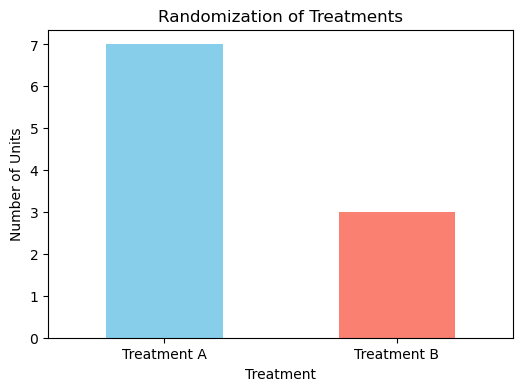

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of experimental units
n = 10
# Treatments
treatments = ['Treatment A', 'Treatment B']

# Randomly assign treatments
np.random.seed(42)  # For reproducibility
assignments = np.random.choice(treatments, size=n)

# Create a DataFrame to simulate this randomization process
df = pd.DataFrame({
    'Unit_ID': range(1, n+1),
    'Treatment': assignments
})

# Plotting the random assignment distribution
treatment_counts = df['Treatment'].value_counts()

plt.figure(figsize=(6, 4))
treatment_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Randomization of Treatments')
plt.xlabel('Treatment')
plt.ylabel('Number of Units')
plt.xticks(rotation=0)
plt.show()


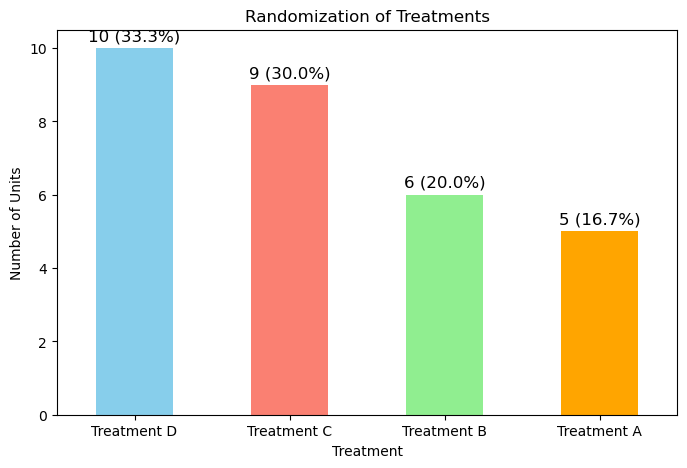

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of experimental units
n = 30
# Treatments
treatments = ['Treatment A', 'Treatment B', 'Treatment C', 'Treatment D']

# Randomly assign treatments to experimental units
np.random.seed(42)  # For reproducibility
assignments = np.random.choice(treatments, size=n)

# Create a DataFrame to simulate this randomization process
df = pd.DataFrame({
    'Unit_ID': range(1, n+1),
    'Treatment': assignments
})

# Visualize the distribution of treatments
treatment_counts = df['Treatment'].value_counts()

# Plotting the random assignment distribution
plt.figure(figsize=(8, 5))
treatment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.title('Randomization of Treatments')
plt.xlabel('Treatment')
plt.ylabel('Number of Units')
plt.xticks(rotation=0)

# Adding percentage labels on top of the bars
for i, v in enumerate(treatment_counts):
    plt.text(i, v + 0.2, f'{v} ({v/n*100:.1f}%)', ha='center', fontsize=12)

plt.show()


# 3.5 block design and replication 

1. Block Design:
In Block Design, experimental units are grouped into blocks based on a known source of variability (e.g., soil type, age group). Treatments are then randomly assigned within each block. The purpose of blocking is to control for this known source of variation, ensuring that treatment effects are not confounded by factors we can control.

2. Replication:
Replication refers to repeating the treatment on multiple experimental units. Replication helps to ensure that the observed effects are reliable and not due to random variability.

For example, if we are testing 4 treatments, each treatment should be applied to multiple units (replicates). This allows us to estimate the variance within treatments and conduct statistical tests (like ANOVA) to analyze the significance of the effects.



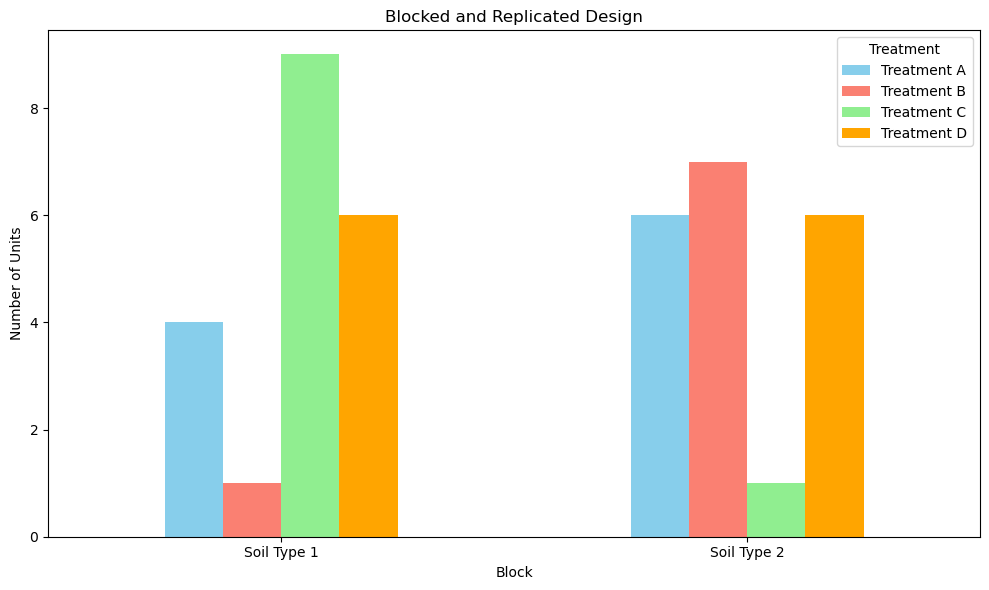

In [17]:
# Number of experimental units per block (5 replicates per treatment)
replicates = 5
# Number of blocks (2 soil types)
blocks = ['Soil Type 1', 'Soil Type 2']
# Treatments
treatments = ['Treatment A', 'Treatment B', 'Treatment C', 'Treatment D']

# Number of experimental units (5 replicates for each of the 4 treatments in 2 blocks)
n_units = replicates * len(treatments) * len(blocks)

# Randomly assign treatments within each block
np.random.seed(42)

# Create a list for blocks
block_assignments = np.repeat(blocks, replicates * len(treatments))

# Randomly assign treatments within each block
treatment_assignments = []
for block in blocks:
    # Randomly assign treatments within each block
    block_treatments = np.random.choice(treatments, size=replicates * len(treatments), replace=True)
    treatment_assignments.extend(block_treatments)

# Create DataFrame for blocked and replicated design
df_blocked_rep = pd.DataFrame({
    'Unit_ID': range(1, n_units + 1),
    'Block': block_assignments,
    'Treatment': treatment_assignments
})



# Plotting the treatment distribution across blocks
treatment_counts = df_blocked_rep.groupby(['Block', 'Treatment']).size().unstack()

# Plot the bar plot
treatment_counts.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.title('Blocked and Replicated Design')
plt.xlabel('Block')
plt.ylabel('Number of Units')
plt.xticks(rotation=0)
plt.legend(title="Treatment")
plt.tight_layout()
plt.show()

# Conclusion: Factorial Experiments
Factorial experiments are a powerful tool in experimental design because they allow for the exploration of multiple factors and their interactions simultaneously. Fisher’s work laid the groundwork for the systematic approach to analyzing these experiments using main effects and interaction effects.

Key takeaways:

Factorial Designs allow for studying multiple factors at once, making experiments more efficient.
Main Effects describe the impact of each individual factor on the outcome.
Interaction Effects reveal how factors work together to influence the outcome.
Two-Way ANOVA is commonly used to analyze factorial designs, revealing the significance of factors and their interactions.
We’ve walked through the basics of 2-level factorial designs and simulated a 2^3 factorial design using Python. We also performed a two-way ANOVA to analyze the data and interpret the effects of factors and their interactions.